### 랜덤포레스트 : Random Forest 

- decision tree를 여러 개 만듬

1. 의사결정나무 모델의 단점
2. 앙상블
3. 랜덤포레스트 개요
4. Bagging
5. Random Subspace

#### 1. 의사결정나무 모델의 단점
- 계층적 구조로 중간에 에러가 발생하면 다음단계로 에러 전파
- 학습 데이터의 미세한 변동에도 최종 결과가 크게 영향
- 최종 노드의 갯수를 늘리면 과적합의 위험 : Low Bias, Large Variance
- 랜덤 포레스트를 사용하면 보완가능

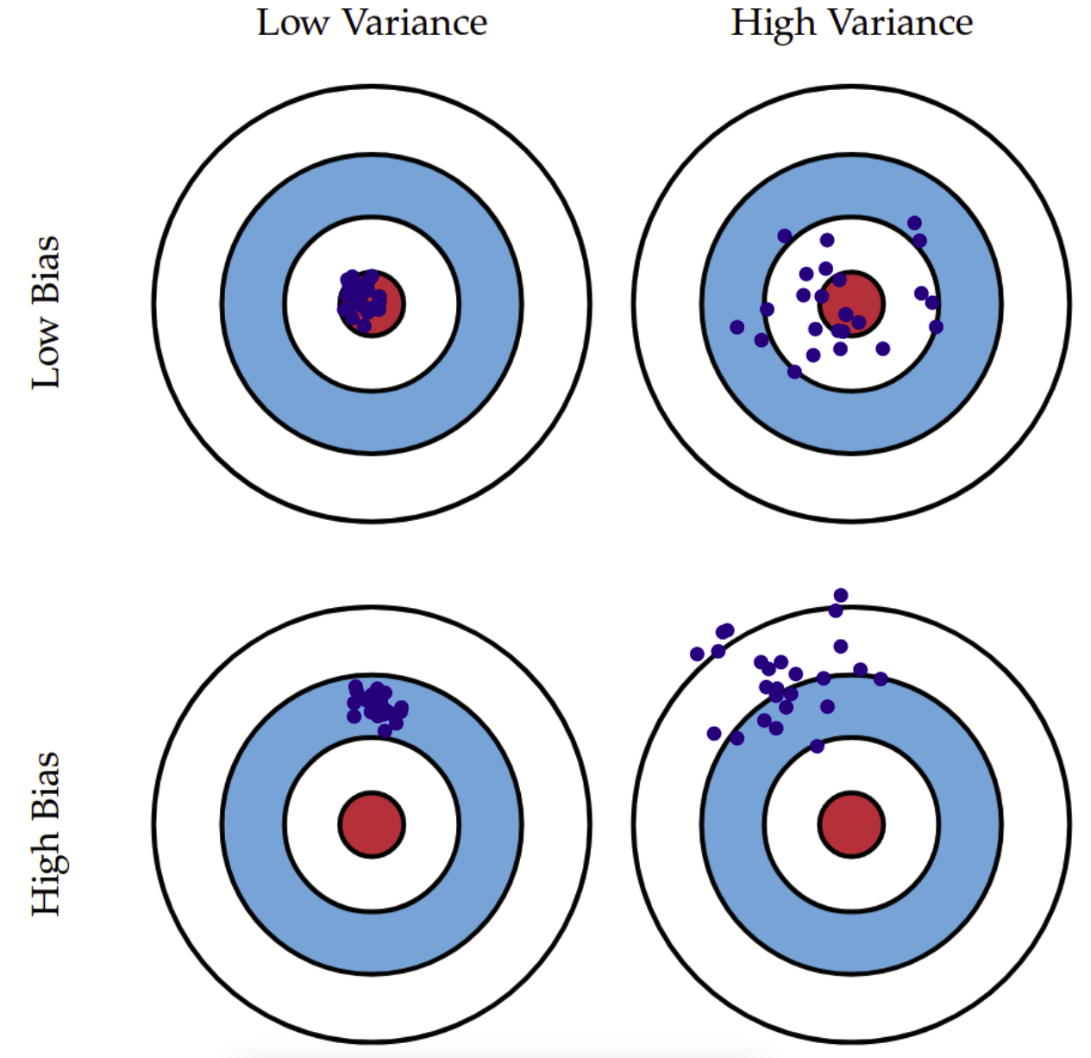

#### 2. 앙상블
- 여러 모델의 예측을 다수결 법칙이나 평균을 이용해 모델을 통합해서 하나의 모델로 만드는 방법
- 여러 모델의 장점을 결합하기 때문에 하나의 모델을 사용하는것보다 성능이 좋아짐
- 아래의 조건을 만족시켜야 하나의 모델을 사용할때 보다 성능이 우수함
    - Base 모델이 서로 독립적일때
    - Base 모델의 무작위 예측을 하는것보다 모델의 성능이 좋은경우

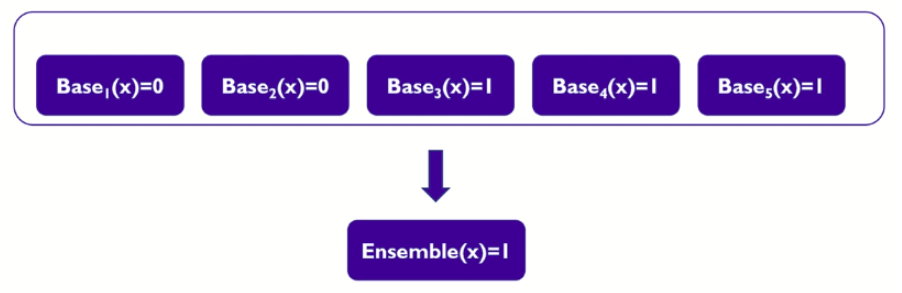

- 앙상블 모델의 에러율
$$e_{ensemble} = \sum^N_{i=[N/2]} \begin{bmatrix}N\\i\\\end{bmatrix} e^i(1-e)^N-1$$


$$ e: Base 모델의 오류율, N : Base 모델의 수 $$

- Base 모델의 오류율보다 앙상블 모델의 오류율이 작아지는 0.5 이하의 오류율을 가지는 모델들을 사용해야 한다.

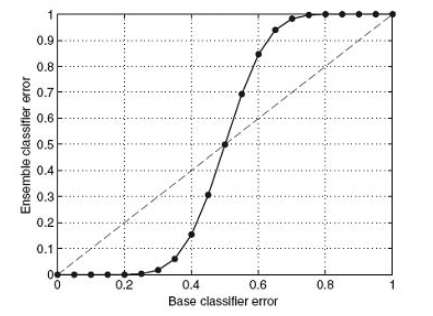

- 의사결정나무 모델은 앙상블 모델의 Base 모델로 활용도가 높음
    - 데이터의 크기가 큰 경우에도 모델을 빨리 구축가능
    - 데이터 분포에 대한 전제가 필요하지 않음

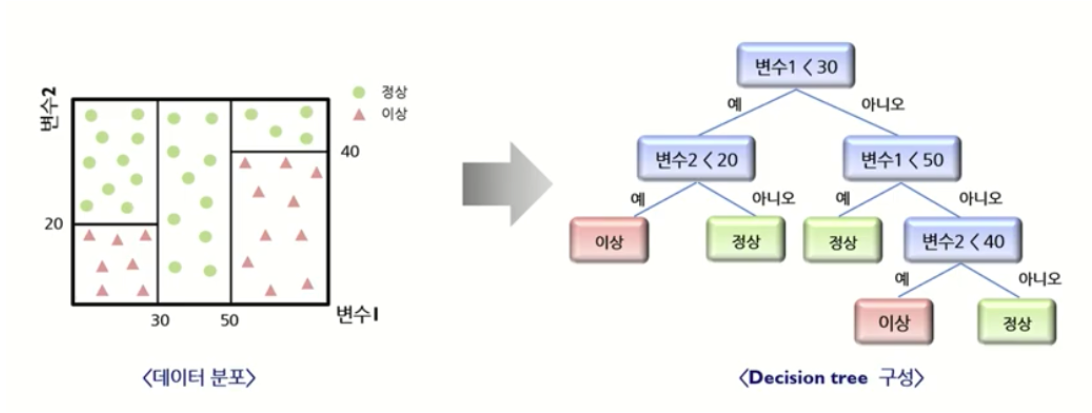

1. Ensemble 관련 모델
2. 확률기반 모델 : 나이브베이즈, A일 확률이 80%, B 70%
3. 커널기반 모델 : SVM
    
=> linear regression, logistic regression

rf(xgboost, adaboost), nb, svm
각자의 장점을 가지고 하는 것이 중요

#### 3. 랜덤포레스트 개요
- 다수의 의사결정나무모델에 의한 예측을 종합하는 앙상블 방법
- 하나의 의사결정나무모델보다 좋은 예측 성능을 보여줌
- 관측치에 비해 변수의 수가 많은 고차원 데이터에서 중요 변수 선택기법으로 활용

- Bootstrap 기법을 이용하여 다수의 train data 생성
- train data로 decision tree 모델 구축 (무작위 feature 사용)
- 여러개의 모델에 대한 결과를 병합하여 예측

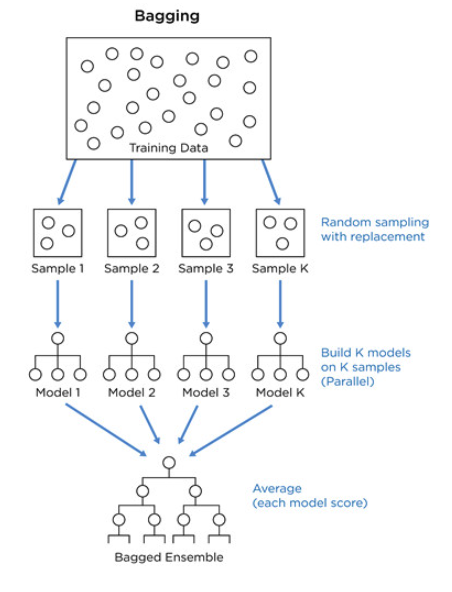

- 아이디어 : Diversity, Random
    - 상이성 확보
        - Bagging : 여러개의 Train data를 생성하여 각 데이터 마다 개별의 의사나무모델 구축
    - 랜덤성 확보
        - Random Subspace : 의사결정나무 모델 구축시 변수를 무작위로 선택
모델이 서로서로 비슷해야함

#### 4. Bagging
    - Bootstrap Aggregating
    - 다수의 학습 데이터셋을 생성해서 다수의 모델을 만들고 다수의 모델을 하나의 모델로 결합하는 방법

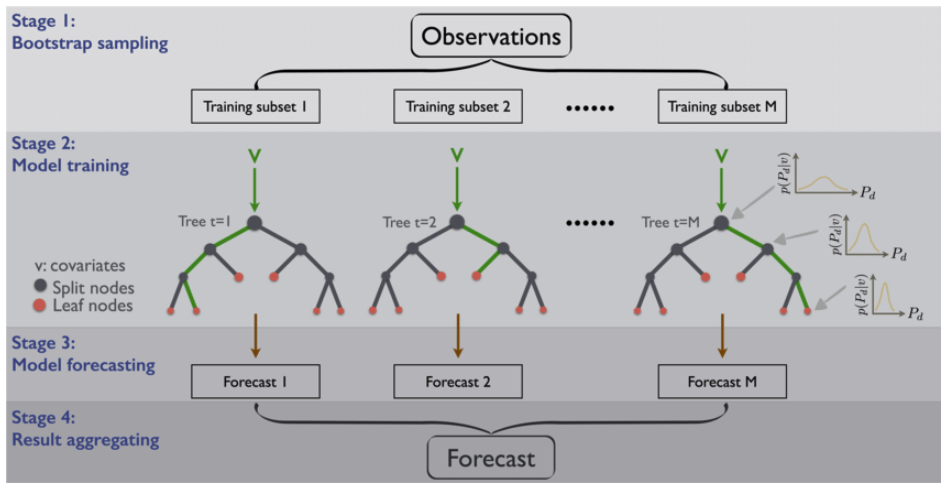

- Bootstrapping
    - 샘플링 방법
    - 각 모델은 서로 다른 학습 데이터셋을 이용
    - 각 데이터 셋은 복원추출(sampling with replacement)함
        - 복원추출 : 원래 데이터의 수만큼의 크기로 샘플데이터 생성
    - 개별 데이터셋을 부트스트랩셋이라고 부름

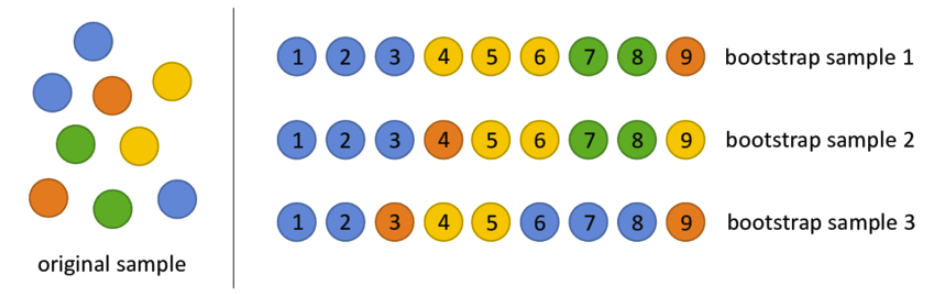

- Aggregating
- 방법 1
  - Predicted class lable 사용
  - Predicted class lable 갯수로 예측값 결정
  - $\sum_{j=1}^{n}I(\hat{y}_j=0) = 4, \sum_{j=1}^{n}I(\hat{y}_j=1) = 6$
    - 예측된 label이 0보다 1이 더 많으므로 1로 예측
- 방법 2
    - Training Accuracy 사용
    - Training Accuracy의 가중평균으로 예측값 결정
    - $\frac{\sum(TrainAcc)I(\hat{y}=0)}{\sum(TrainAcc)}=0.424$
    - $\frac{\sum(TrainAcc)I(\hat{y}=1)}{\sum(TrainAcc)}=0.576$
    - 예측된 label의 가중평균이 0보다 1이 더 높으므로 1로 예측
- 방법 3 : P(y=1) for a test instance
    - 결과값에 대한 확률데이터를 사용
    - 모든 모델에서 각 label의 확률값의 평균으로 결정
    - $\frac{\sum{P(y=0)}}{n}=0.371, \frac{\sum{P(y=1)}}{n}=0.629$
    - 1로 예측한 확률의 평균이 높기 때문에 1로 예측

In [ ]:
%config InlineBackend.figure_formats = {'png', 'retina'}

import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# 방법 2
train_acc_0 = 0.91 + 0.77 + 0.95 + 0.82
train_acc_1 = 0.80 + 0.75 + 0.88 + 0.65 + 0.78 + 0.83
train_acc_total = 0.80 + 0.75 + 0.88 + 0.91 + 0.77 + 0.65 + 0.95 + 0.82 + 0.78 + 0.83
train_acc_0 / train_acc_total, train_acc_1 / train_acc_total # 1로 예측

In [ ]:
# 방법 3
test_instance_0 = 0.1 + 0.08 + 0.13 + 0.66 + 0.59 + 0.16 + 0.86 + 0.68 + 0.02 + 0.43
test_instance_1 = 0.9 + 0.92 + 0.87 + 0.34 + 0.41 + 0.84 + 0.14 + 0.32 + 0.98 + 0.57
np.round(test_instance_0 / 10, 3), np.round(test_instance_1 / 10, 3) # 1로 예측

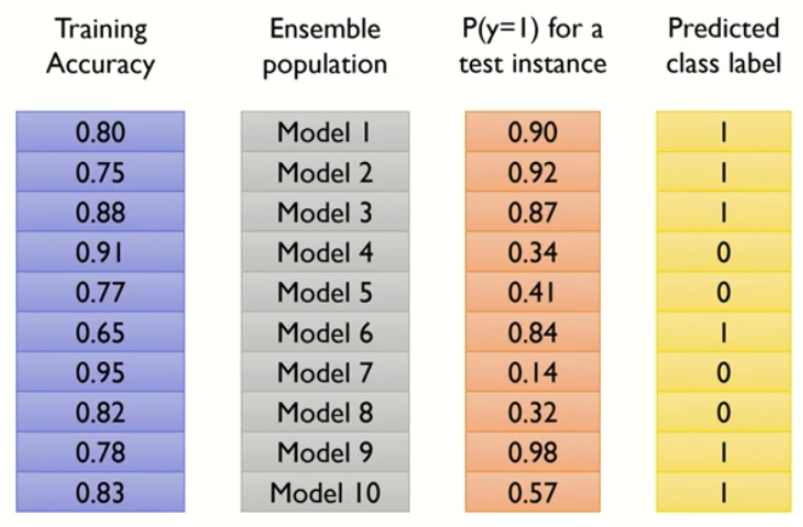

#### 5. Random Subspace
- 하나의 모델 만들기
    - 전체 feature에서 특정 갯수(hyper parameter)개의 변수를 선택
    - Information Gain이 가장 높은 변수 하나를 선택해서 노드를 생성
    - 위의 방법을 반복적으로 수행해서 트리를 형성(hyper parameter:tree의 level)
    - 전체 feature에서 선정된 특정갯수의 feature로만 트리를 생성함
- 위의 방법으로 여러개의 모델을 생성

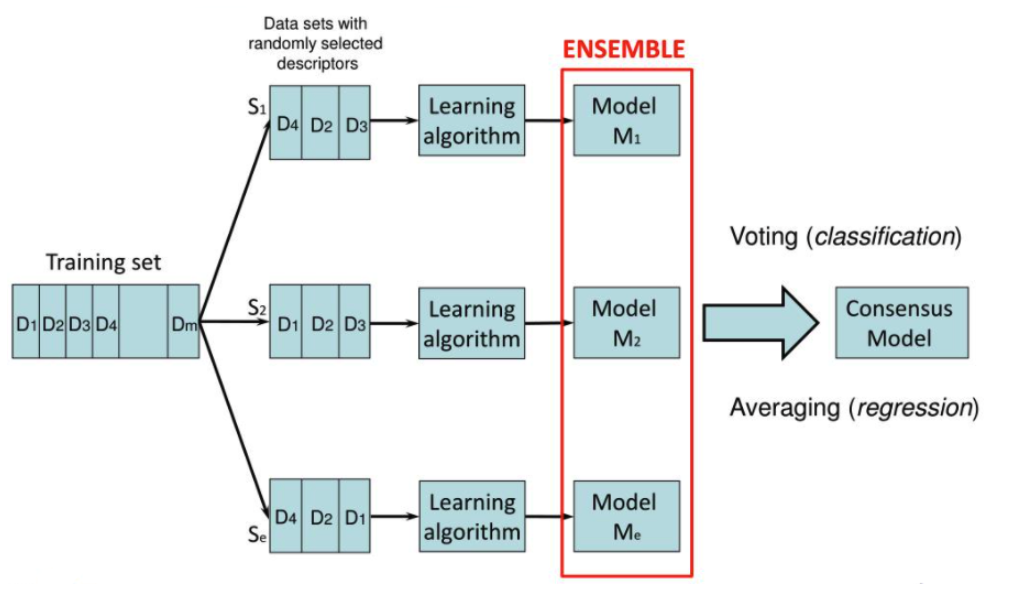

#### 6. 실습예제
- hypter parameter
    - n_estimators : 트리의 갯수 : 많을수록 과적합을 피할수 있다 : 2000개 이상
    - max_depth : 트리의 레벨
    - max_features : 최대 변수의 갯수

In [ ]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import mglearn

In [ ]:
# 샘플 데이터
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

# 데이터셋 분리 : stratify : y 데이터의 비율을 맞춤
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 모델 생성 및 학습
model = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), model.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(model, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.show()